In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from mpl_toolkits import mplot3d
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings("ignore")

random_state = 42

In [2]:
X_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
delimiter = ','
X0 = pd.read_csv(X_url, delimiter=delimiter)
X0.shape

(440, 8)

In [3]:
X0.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [4]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X0_no_nominal = X0.iloc[:, 2:]  # remove Channel and Region columns
X_pt = pd.DataFrame(pt.fit_transform(X0_no_nominal), columns=X0_no_nominal.columns)
X_transformed = pd.concat([X0.iloc[:, :2], X_pt], axis=1)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(X_transformed), columns=X_transformed.columns)
X.head()


Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0      1.0     1.0  0.501828  0.667606  0.625238  0.208640          0.649941   
1      1.0     1.0  0.414266  0.670028  0.655690  0.458800          0.674852   
2      1.0     1.0  0.400077  0.653586  0.627297  0.499856          0.682752   
3      0.0     1.0  0.509368  0.369264  0.553550  0.636716          0.461095   
4      1.0     1.0  0.604755  0.580657  0.618985  0.566470          0.601884   

   Delicassen  
0    0.412016  
1    0.445663  
2    0.654292  
3    0.446485  
4    0.590255

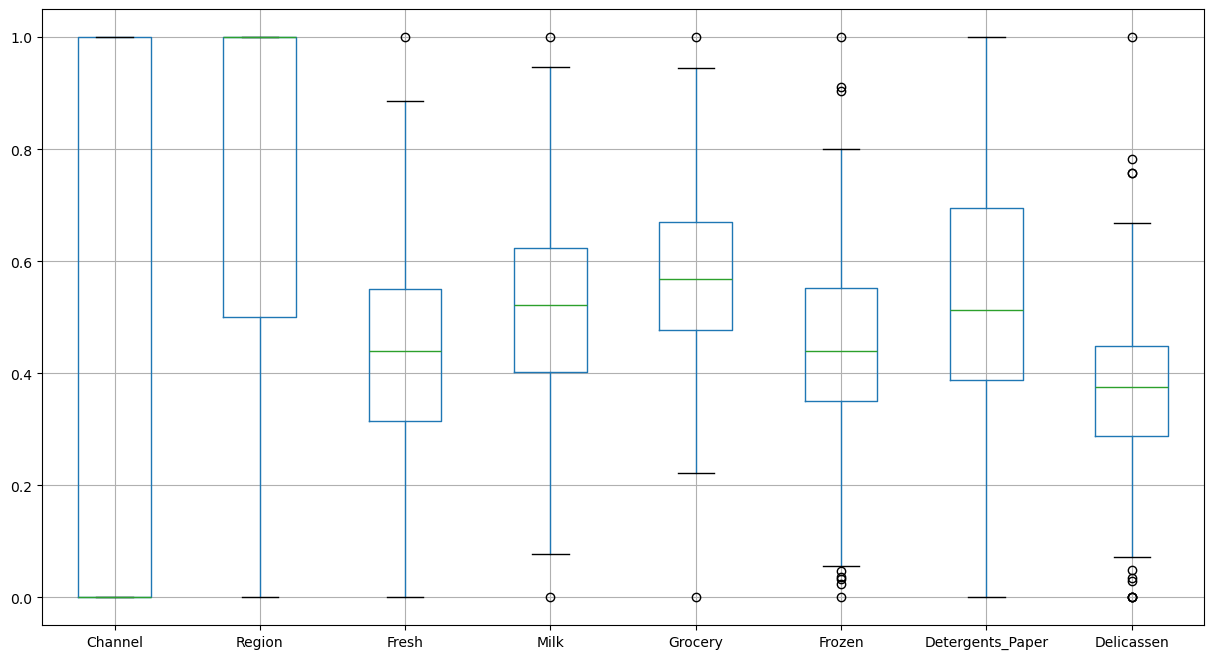

In [5]:
X.boxplot(figsize=(15,8));
plt.show()

In [6]:
k_range = list(range(2,11))
parameter_km = {'n_clusters': k_range}
pg = list(ParameterGrid(parameter_km))
inertias_km = []
silhouette_scores_km = []
for i in range(len(pg)):
    km = KMeans(pg[i]['n_clusters'],random_state=random_state)
    y_km = km.fit_predict(X)
    inertias_km.append(km.inertia_)
    silhouette_scores_km.append(silhouette_score(X,y_km)) 

In [7]:
k=4
km = KMeans(n_clusters=k, 
            random_state=random_state)
y_km = km.fit_predict(X)
print("Number of clusters = {}\t- Distortion = {:6.2f}\t- Silhouette score = {:4.2f}"\
    .format(k,inertias_km[k_range.index(k)],silhouette_scores_km[k_range.index(k)]))

Number of clusters = 4	- Distortion =  54.49	- Silhouette score = 0.49


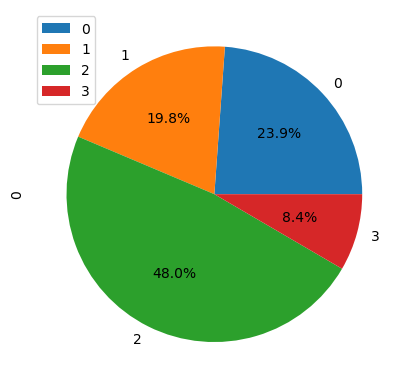

In [23]:
clust_sizes_km = np.unique(y_km,return_counts=True)
pd.DataFrame(clust_sizes_km[1]).plot.pie(y=0, autopct='%1.1f%%', );
plt.show()

## Agglomerative clustering

In [19]:
parameters = [
    {
        'n_clusters': k_range
        ,'linkage' : ['ward', 'complete', 'average', 'single']
    }
]

pg = list(ParameterGrid(parameters))

In [20]:
from sklearn.cluster import AgglomerativeClustering
results_ac = []
for i in range(len(pg)):
    ac = AgglomerativeClustering(n_clusters=pg[i]['n_clusters'], linkage=pg[i]['linkage'])
    y_ac = ac.fit_predict(X)
    results_ac.append([pg[i]['n_clusters'],pg[i]['linkage'],silhouette_score(X,y_ac)])

In [21]:
df_result_ac = pd.DataFrame(data=results_ac,columns=['n_clusters','linkage','silhouette_score'])
df_result_ac.sort_values(by='silhouette_score',ascending=False)

n_clusters   linkage  silhouette_score
0            2      ward          0.499350
9            2  complete          0.499350
27           2    single          0.499350
18           2   average          0.499350
1            3      ward          0.498333
2            4      ward          0.493085
20           4   average          0.479507
11           4  complete          0.479507
21           5   average          0.475050
22           6   average          0.443867
23           7   average          0.429079
24           8   average          0.417343
33           8    single          0.402861
10           3  complete          0.402228
19           3   average          0.402228
13           6  complete          0.358410
12           5  complete          0.350571
34           9    single          0.349389
29           4    single          0.343557
28           3    single          0.343530
25           9   average          0.343345
3            5      ward          0.342252
26          10   average          0.338956
4            6      ward          0.333632
35          10    single          0.332562
5            7      ward          0.318470
30           5    single          0.292567
6            8      ward          0.285732
14           7  complete          0.280073
32           7    single          0.257306
7            9      ward          0.256243
8           10      ward          0.242371
15           8  complete          0.224454
31           6    single          0.212586
16           9  complete          0.185725
17          10  complete          0.166637

In [16]:
print(df_result_ac.iloc[[2]])

   n_clusters linkage  silhouette_score
2           4    ward          0.493085


In [22]:
ac = AgglomerativeClustering(**(pg[2]))
y_ac = ac.fit_predict(X)

In [25]:
cluster_sizes_ac = np.unique(y_ac,return_counts=True)
cluster_sizes_ac

(array([0, 1, 2, 3]), array([212,  37,  86, 105]))

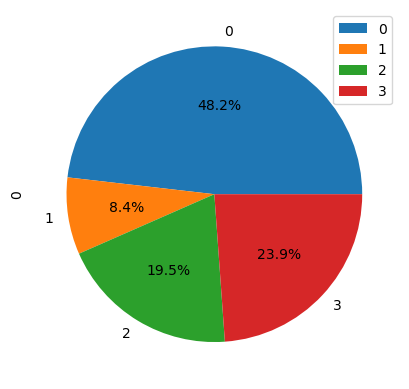

In [30]:
pd.DataFrame(cluster_sizes_ac[1]).plot.pie(y=0, autopct='%1.1f%%')
plt.show()

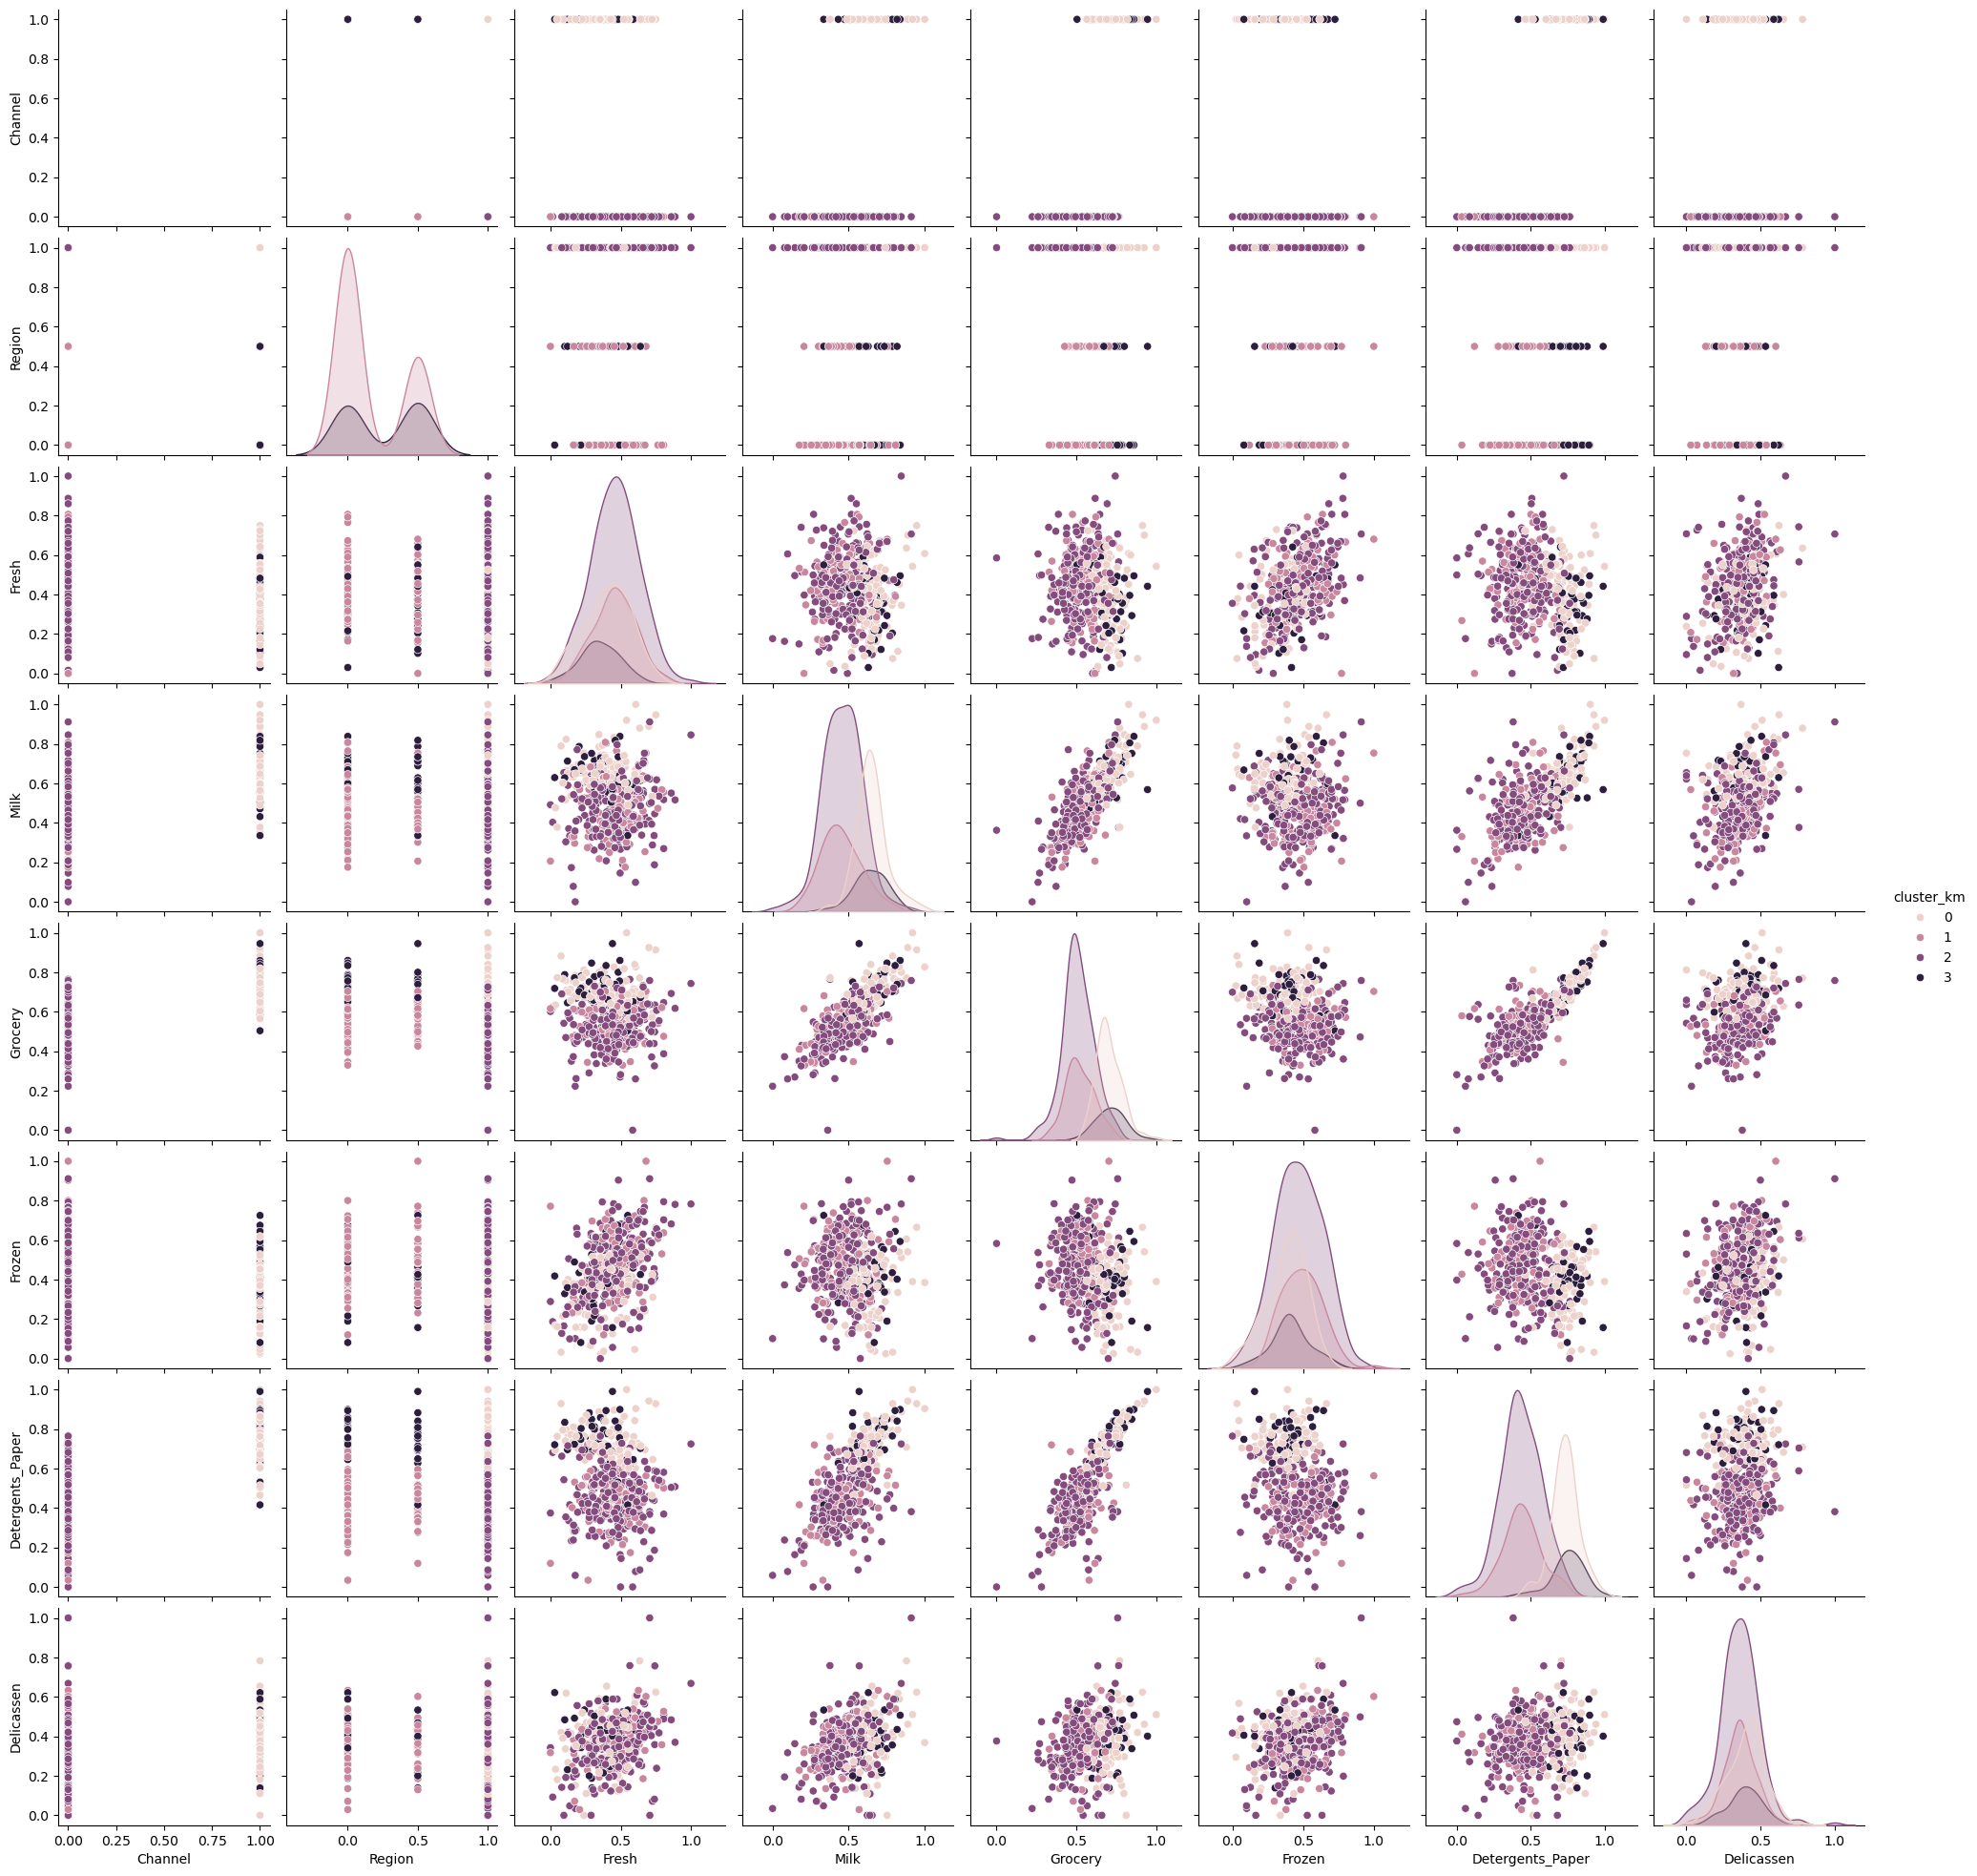

In [33]:
X['cluster_km']=y_km
sns.pairplot(data=X, hue='cluster_km');
plt.show()

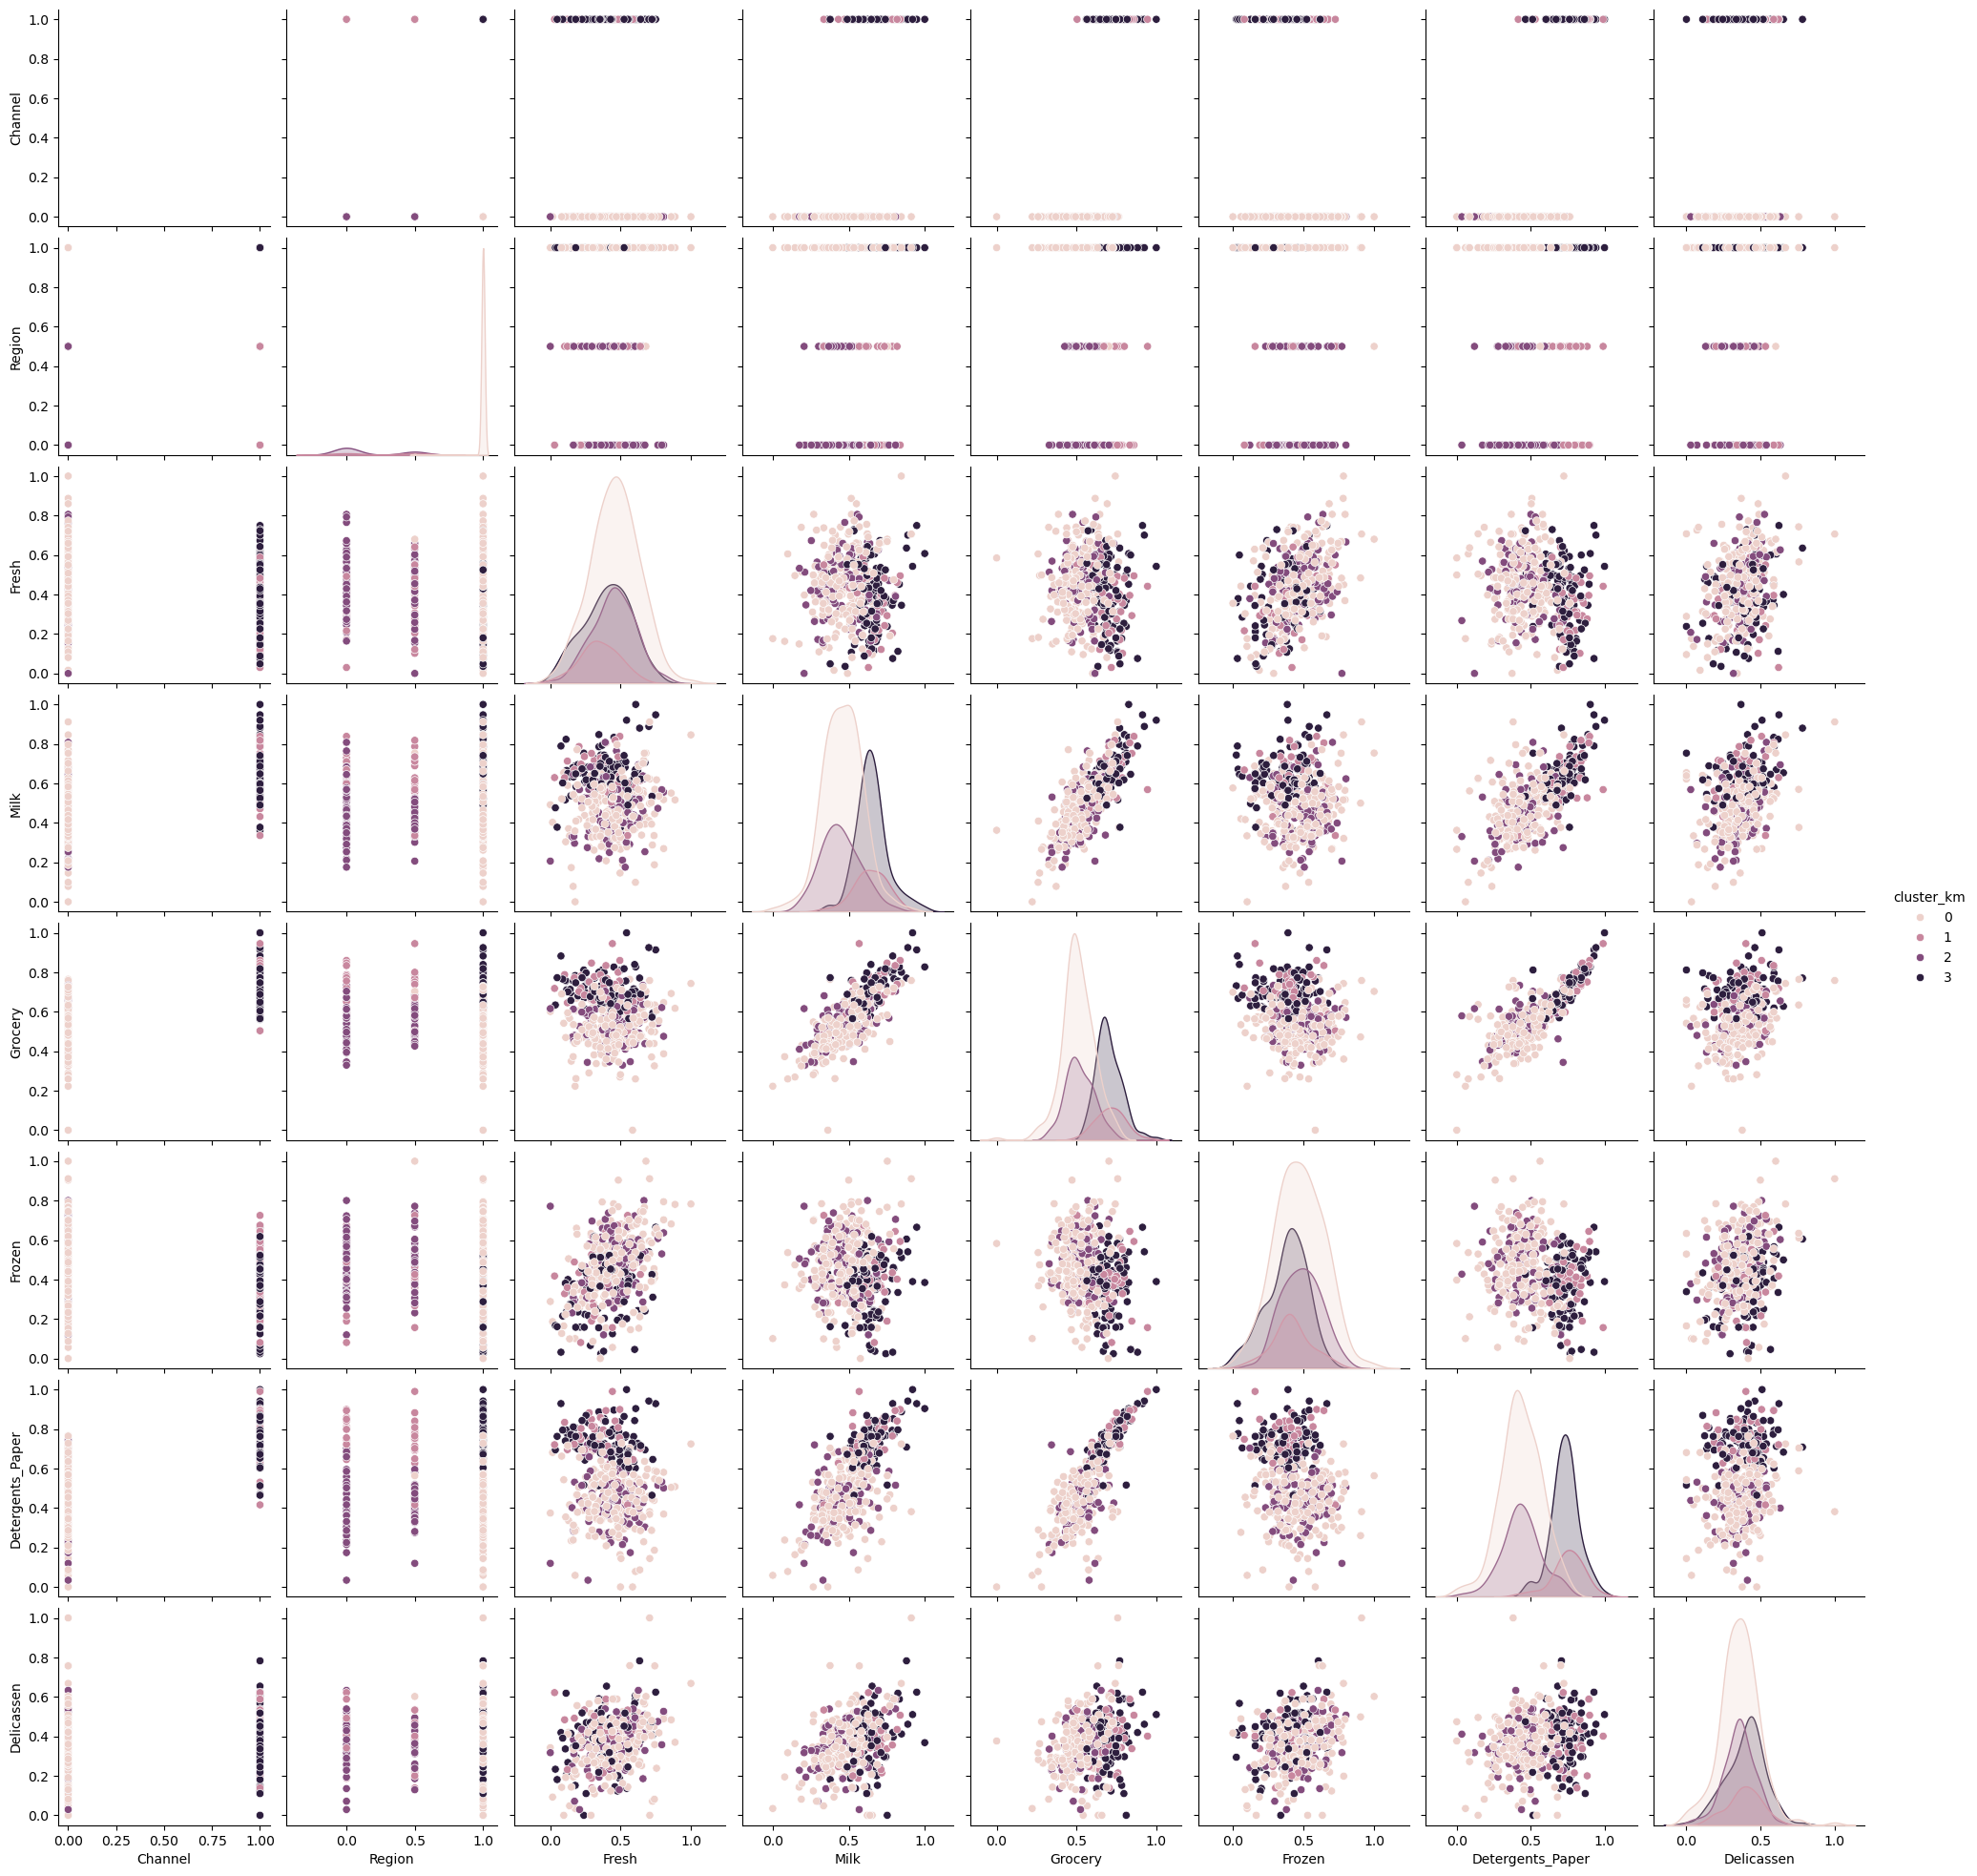

In [34]:
X['cluster_km']=y_ac
sns.pairplot(data=X, hue='cluster_km');
plt.show()

In [37]:
from sklearn.metrics import pair_confusion_matrix
pcm = pair_confusion_matrix(y_km,y_ac)
pcm / pcm.sum()

array([[0.66625595, 0.00218472],
       [0.00089045, 0.33066888]])

In [38]:
print("The percentage of match between the two clustering schemes is {:6.2f}%"\
    .format((pcm / pcm.sum()).diagonal().sum()*100))

The percentage of match between the two clustering schemes is  99.69%


In [40]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
y_db = db.fit_predict(X)

In [41]:
print("Default parameters - Eps={} - Min_Samples={}".format(db.eps,db.min_samples))

Default parameters - Eps=0.5 - Min_Samples=5


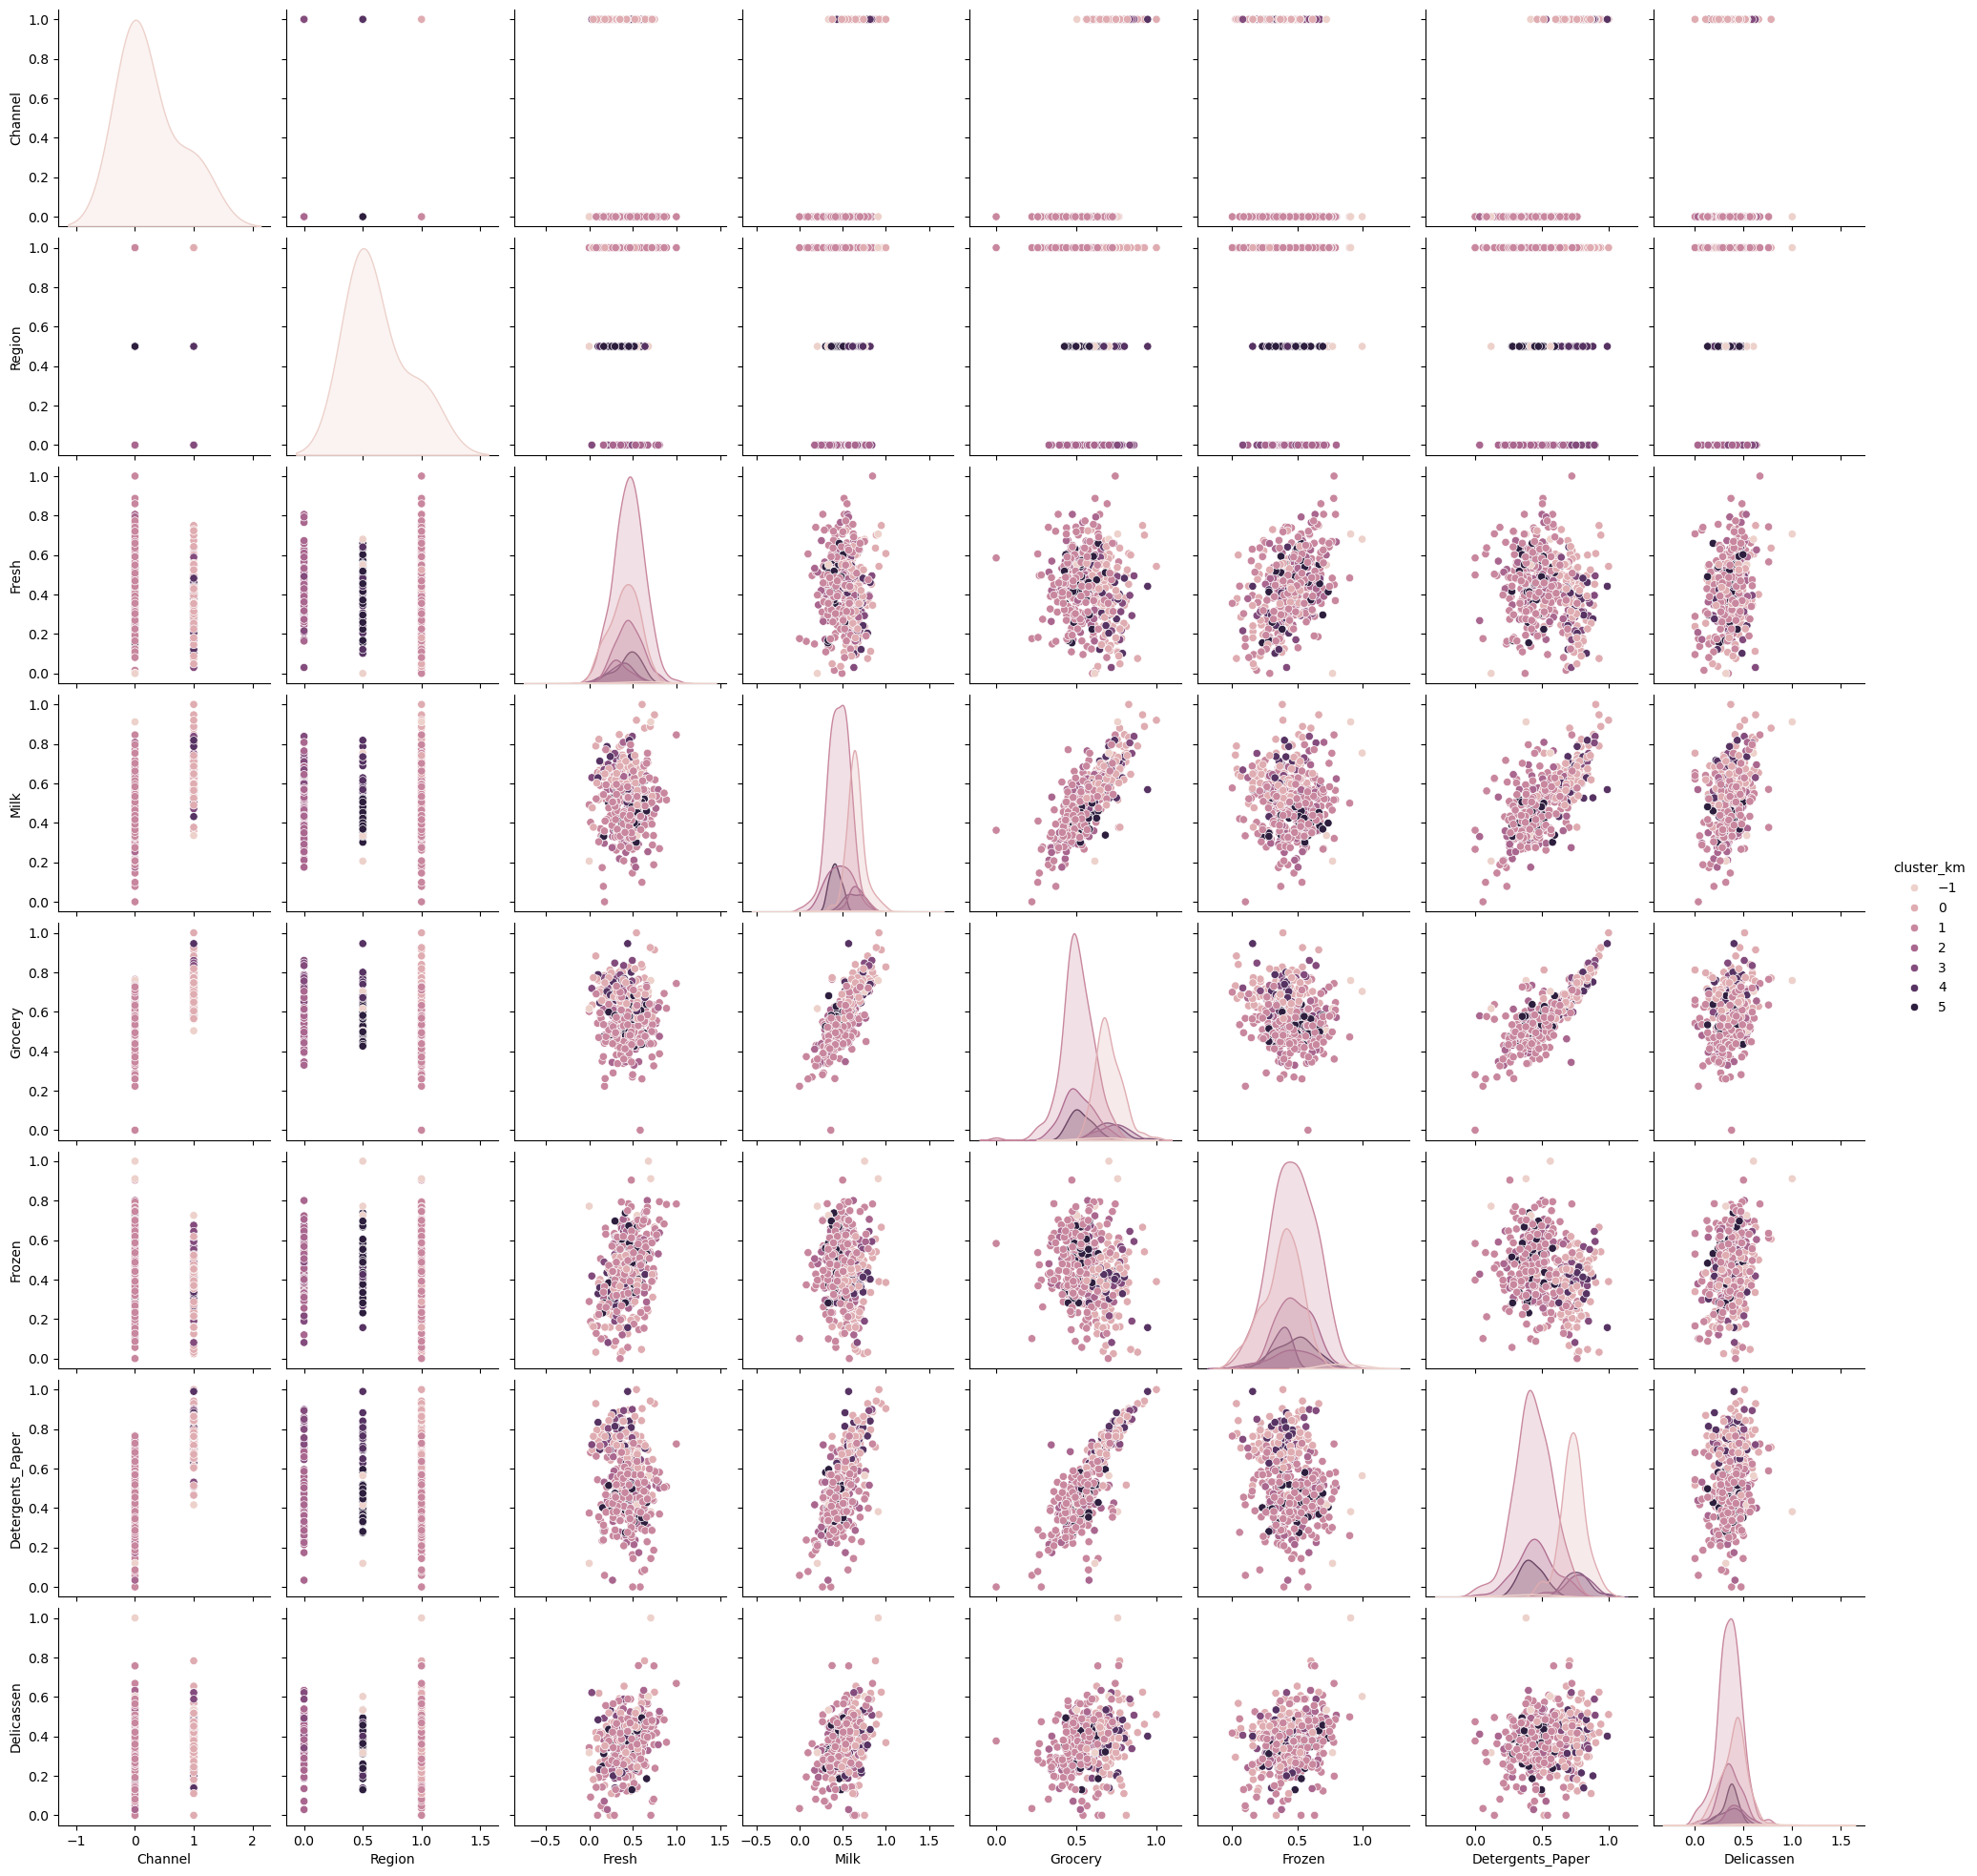

In [42]:
X['cluster_km']=y_db
sns.pairplot(data=X, hue='cluster_km');
plt.show()

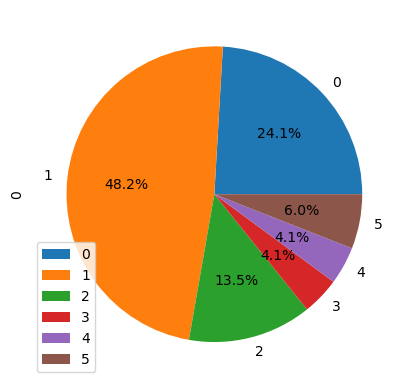

In [43]:
clust_sizes_db = np.unique(y_db[y_db!=-1],return_counts=True)
pd.DataFrame(clust_sizes_db[1]).plot.pie(y=0, autopct='%1.1f%%', );
plt.show()

In [61]:
X.drop('cluster_km', axis=1, inplace=True)

In [62]:
param_grid = {'eps': list(np.arange(0.001, 1, 0.005)), 'min_samples': list(range(2,10,1))}
params = list(ParameterGrid(param_grid))

In [63]:
dbscan_out = pd.DataFrame(columns =  ['eps','min_samples','n_clusters','silhouette', 'unclust%'])
for i in range(len(params)):
    db = DBSCAN(**(params[i]))
    y_db = db.fit_predict(X)
    cluster_labels_all = np.unique(y_db)
    cluster_labels = cluster_labels_all[cluster_labels_all != -1]
    n_clusters = len(cluster_labels)
    if n_clusters > 1 and n_clusters < len(X):
        X_cl = X.loc[y_db!=-1,:]
        y_db_cl = y_db[y_db!=-1]
        sil_score = silhouette_score(X_cl, y_db_cl)
        uncl_p = (1 - y_db_cl.shape[0]/y_db.shape[0]) * 100 # percentage of unclustered points
        dbscan_out.loc[len(dbscan_out)] = [params[i]['eps'], params[i]['min_samples'], n_clusters, sil_score, uncl_p]

In [64]:
sil_thr = 0.0  # visualize results only for combinations with silhouette above the threshold
unc_thr = 22 # visualize results only for combinations with unclustered% below the threshold
n_clu_max_thr = 5
dbscan_out[(dbscan_out['silhouette']>=sil_thr)\
         & (dbscan_out['unclust%']<=unc_thr)\
         & (dbscan_out['n_clusters']<=n_clu_max_thr)].sort_values(['silhouette','unclust%'],ascending=[False,True])

eps  min_samples  n_clusters  silhouette   unclust%
652   0.506          2.0         4.0    0.529010   0.909091
653   0.506          3.0         4.0    0.529010   0.909091
654   0.506          4.0         4.0    0.529010   0.909091
655   0.506          5.0         4.0    0.529010   0.909091
656   0.506          6.0         4.0    0.529010   0.909091
...     ...          ...         ...         ...        ...
1442  0.996          8.0         2.0    0.499350   0.000000
1443  0.996          9.0         2.0    0.499350   0.000000
235   0.241          9.0         5.0    0.393057  21.590909
243   0.246          9.0         5.0    0.393057  21.590909
251   0.251          9.0         5.0    0.392397  20.454545

[795 rows x 5 columns]

In [65]:
dbscan_out[(dbscan_out['n_clusters']==4)].sort_values(['silhouette','unclust%'],ascending=[False,True])

eps  min_samples  n_clusters  silhouette   unclust%
0    0.051          2.0         4.0    0.809127  98.181818
55   0.131          5.0         4.0    0.577401  75.681818
114  0.166          8.0         4.0    0.564877  59.090909
123  0.171          9.0         4.0    0.556483  57.500000
122  0.171          8.0         4.0    0.554163  55.454545
131  0.176          9.0         4.0    0.552283  54.772727
130  0.176          8.0         4.0    0.551633  53.181818
139  0.181          9.0         4.0    0.549653  53.863636
138  0.181          8.0         4.0    0.549119  51.590909
120  0.171          6.0         4.0    0.546914  49.545455
111  0.166          5.0         4.0    0.545816  50.681818
128  0.176          6.0         4.0    0.544325  46.363636
147  0.186          9.0         4.0    0.538980  50.000000
119  0.171          5.0         4.0    0.537250  46.590909
652  0.506          2.0         4.0    0.529010   0.909091
653  0.506          3.0         4.0    0.529010   0.909091
654  0.506          4.0         4.0    0.529010   0.909091
655  0.506          5.0         4.0    0.529010   0.909091
656  0.506          6.0         4.0    0.529010   0.909091
657  0.506          7.0         4.0    0.529010   0.909091
658  0.506          8.0         4.0    0.529010   0.909091
659  0.506          9.0         4.0    0.529010   0.909091
162  0.196          8.0         4.0    0.516842  37.727273
163  0.196          9.0         4.0    0.514844  41.136364
171  0.201          9.0         4.0    0.513659  39.318182
179  0.206          9.0         4.0    0.511789  36.363636
161  0.196          7.0         4.0    0.510886  35.909091
170  0.201          8.0         4.0    0.509058  35.909091
187  0.211          9.0         4.0    0.503088  34.090909
169  0.201          7.0         4.0    0.502949  34.545455
178  0.206          8.0         4.0    0.499673  33.181818
186  0.211          8.0         4.0    0.498606  32.954545
195  0.216          9.0         4.0    0.490289  32.045455
203  0.221          9.0         4.0    0.485615  29.772727
194  0.216          8.0         4.0    0.485379  30.454545
211  0.226          9.0         4.0    0.483599  28.181818
202  0.221          8.0         4.0    0.483369  28.409091
22   0.106          4.0         4.0    0.478732  91.590909
28   0.111          5.0         4.0    0.455728  92.045455
64   0.136          6.0         4.0    0.450831  77.045455
40   0.121          6.0         4.0    0.412454  90.000000
19   0.101          5.0         4.0    0.400643  95.454545
72   0.141          6.0         4.0    0.397130  71.818182
98   0.156          8.0         4.0    0.382141  69.318182
129  0.176          7.0         4.0    0.354982  49.318182
106  0.161          8.0         4.0    0.353064  67.045455
39   0.121          5.0         4.0    0.282229  87.045455

In [66]:
best = {'eps':0.506, 'min_samples': 2}

db = DBSCAN(**best)
y_db = db.fit_predict(X)

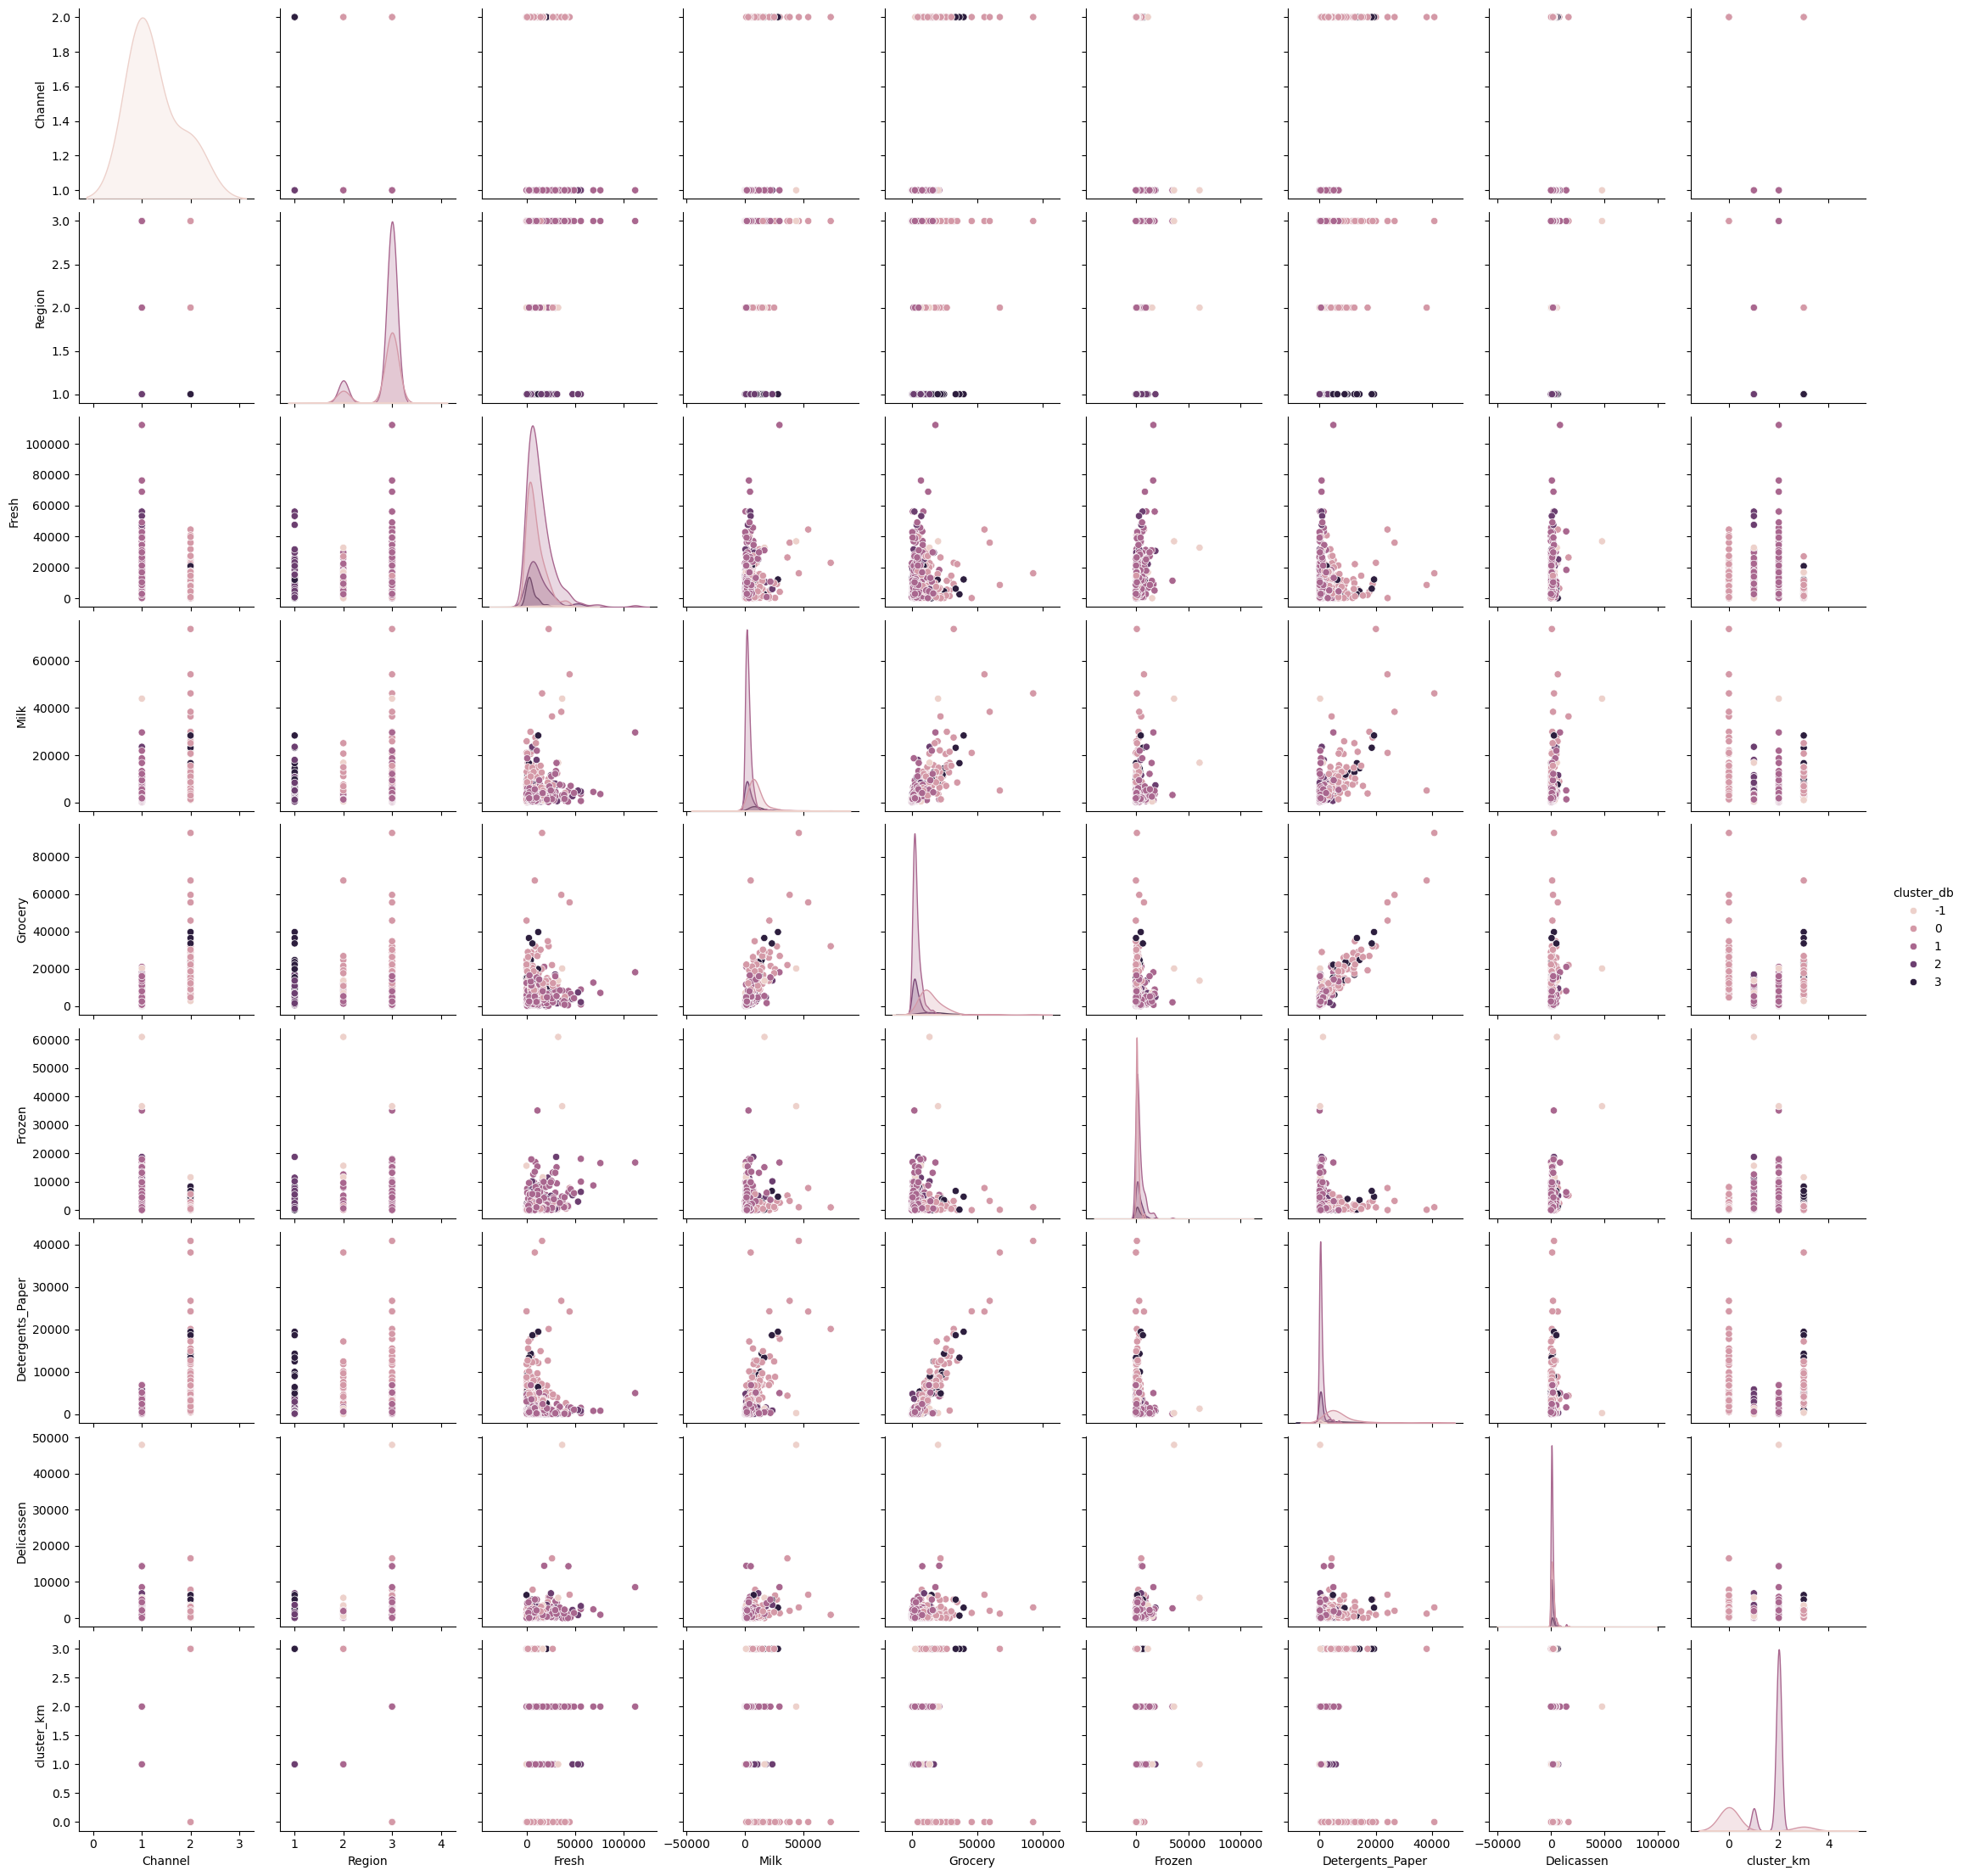

In [69]:
X0['cluster_db']=y_db
sns.pairplot(data=X0, hue='cluster_db');
plt.show()

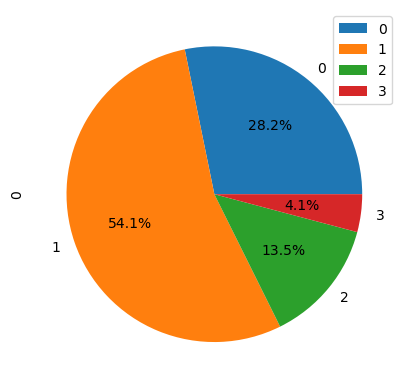

In [70]:
clust_sizes_db = np.unique(y_db[y_db!=-1],return_counts=True)
pd.DataFrame(clust_sizes_db[1]).plot.pie(y=0
                                         , autopct='%1.1f%%'
                                         );
plt.show()